# 01 - Exploration

## 1. Imports & Plot Styling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

## 2. Load Raw Premier League Dataset

In [3]:
df = pd.read_csv("../data/raw/E0.csv")
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10


## 3. Basic Dataset Overview

In [7]:
print("Shape:", df.shape)
print ("Columns:", df.columns.tolist())

# Look at the missing values
df.isnull().sum().head(20)

Shape: (380, 120)
Columns: ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'BFH', 'BFD', 'BFA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', '1XBH', '1XBD', '1XBA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'BFEH', 'BFED', 'BFEA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'BFE>2.5', 'BFE<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BFEAHH', 'BFEAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'BFCH', 'BFCD', 'BFCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', '1XBCH', '1XBCD', '1XBCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'BFECH', 'BFECD', 'BFECA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'BFEC>2.5', 'BFEC<2.5', 'AHCh', 'B365CAHH', 'B

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
dtype: int64

## 4. Select & Harmonise Bookmaker Odds

In [4]:
df["odds_home"] = df["AvgH"].fillna(df["B365H"])
df["odds_draw"] = df["AvgD"].fillna(df["B365D"])
df["odds_away"] = df["AvgA"].fillna(df["B365A"])

## 5. Convert Odds to Implied Probabilities

In [5]:
# Convert odds to implied prob
df["p_home_raw"] = 1 / df["odds_home"]
df["p_draw_raw"] = 1 / df["odds_draw"]
df["p_away_raw"] = 1 / df["odds_away"]

# Remove bookmaker overroud (so sum to 1)
prob_sum = df[["p_home_raw","p_draw_raw","p_away_raw"]].sum(axis=1)
df["p_home"] = df["p_home_raw"] / prob_sum
df["p_draw"] = df["p_draw_raw"] / prob_sum
df["p_away"] = df["p_away_raw"] / prob_sum

## 6. Preview Implied Probabilities

In [6]:
df[["HomeTeam","AwayTeam","FTR","p_home","p_draw","p_away"]].head()

,HomeTeam,AwayTeam,FTR,p_home,p_draw,p_away
0,Man United,Fulham,H,0.593077,0.220363,0.186560
1,Ipswich,Liverpool,A,0.116055,0.166829,0.717116
2,Arsenal,Wolves,H,0.816672,0.122605,0.060723
3,Everton,Brighton,A,0.359808,0.281727,0.358465
4,Newcastle,Southampton,H,0.710793,0.170742,0.118465


## 7. Create Binary Target for Calibration Diagnostics

In [7]:
# Create binary target: 1 if home win else 0
df["y_homewin"] = (df["FTR"] == "H").astype(int)

## 8. Calibration Analysis of Bookmaker Odds

C:\Users\basti\AppData\Local\Temp\ipykernel_7256\1929954472.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calib = df.groupby("p_bin").agg(


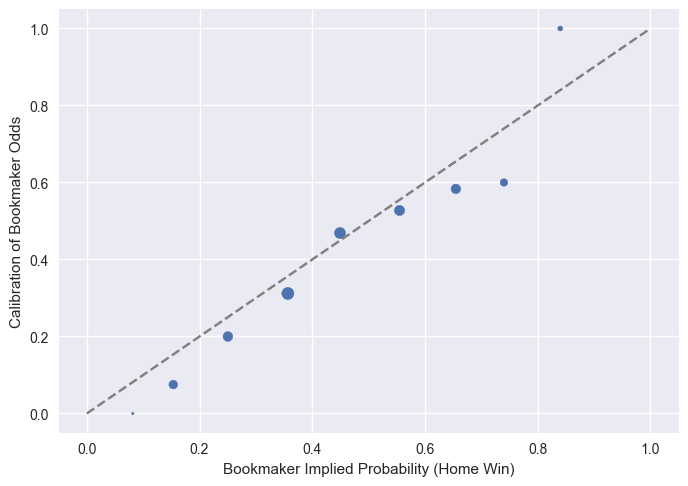

In [9]:
# Bin bookmaker probabilities into buckets
df["p_bin"] = pd.cut(df["p_home"], bins=np.linspace(0,1,11))

calib = df.groupby("p_bin").agg(
    mean_pred=("p_home", "mean"),
    freq_homewin=("y_homewin", "mean"),
    n=("y_homewin","size")
).reset_index()

# Plot calibration
plt.plot([0,1],[0,1],"--",color="gray")
plt.scatter(calib["mean_pred"], calib["freq_homewin"], s=calib["n"])
plt.xlabel("Bookmaker Implied Probability (Home Win)")
plt.ylabel("Calibration of Bookmaker Odds")
plt.show()